# Análise Explorátoria - Classificação de Filmes IMDb

Este projeto consiste em analisar as bases de dados de classificação de filmes da IMBb e TMBd com a linguagem de programação Python e suas principais bibliotecas para análise de dados.
Todos os dados utilizados no projeto podem ser encontrados [aqui](https://github.com/rafaelladuarte/film_rating_exploratory_analysis/tree/main/Dados).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Primiero vamos tratar e analisar conhecida a classificação de filmes da IMBd, também conhecida como Internet Movie Database, é uma base de dados online de informação sobre cinema TV, música e games, hoje pertencente à Amazon.

##  IMBd

### Tratamento

In [2]:
path_imbd_rating = "https://raw.githubusercontent.com/rafaelladuarte/film_rating_exploratory_analysis/main/Dados/ratings.csv"
path_imbd_movie = "https://raw.githubusercontent.com/rafaelladuarte/film_rating_exploratory_analysis/main/Dados/movies.csv"

In [3]:
df_imbd_rating = pd.read_csv(path_imbd_rating)
df_imbd_rating.sample(3)

,userId,movieId,rating,timestamp
83182,527,551,3.0,1033174530
82505,524,168,2.0,851608875
46396,305,69481,5.0,1460135920


In [4]:
df_imbd_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
df_imbd_movie = pd.read_csv(path_imbd_movie)
df_imbd_movie.sample(3)

,movieId,title,genres
3721,5146,Vampire Hunter D: Bloodlust (Banpaia hantâ D) ...,Animation|Fantasy|Horror|Sci-Fi
9065,142420,High Rise (2015),Action|Drama|Sci-Fi
2915,3910,Dancer in the Dark (2000),Drama|Musical


In [6]:
df_imbd_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
df_imbd_rating_mean = df_imbd_rating.groupby("movieId").mean()
df_imbd_rating_mean.sample(5)

,userId,rating,timestamp
movieId,,,
153070,567.0,3.5,1.525283e+09
114028,522.0,4.0,1.491061e+09
4772,28.0,3.5,1.236314e+09
161594,184.0,3.5,1.537108e+09
95796,382.0,0.5,1.515163e+09


In [8]:
df_imbd = pd.merge(df_imbd_rating_mean, df_imbd_movie, how = 'inner', on = 'movieId')
df_imbd.sample(3)

,movieId,userId,rating,timestamp,title,genres
8452,112727,610.0,3.000000,1.493849e+09,Deliver Us from Evil (2014),Crime|Horror|Thriller
5819,32300,433.0,2.833333,1.424224e+09,D.E.B.S. (2004),Action|Comedy
8780,130087,226.0,3.750000,1.479206e+09,The Cobbler (2015),Comedy|Drama|Fantasy


In [9]:
df_imbd["title"].str.extract(r'(\d{4})',expand=True)

,0
0,1995
1,1995
2,1995
3,1995
4,1995
...,...
9719,2017
9720,2017
9721,2017
9722,2018


In [10]:
df_imbd["year"]= df_imbd["title"].str.extract(r'(\d{4})',expand=True)
df_imbd.sample(5)

,movieId,userId,rating,timestamp,title,genres,year
1350,1837,377.750000,2.250000,1.012990e+09,"Odd Couple II, The (1998)",Comedy,1998
6151,44633,253.000000,4.500000,1.286644e+09,"Devil and Daniel Johnston, The (2005)",Documentary,2005
2618,3507,337.666667,4.066667,1.075248e+09,"Odd Couple, The (1968)",Comedy,1968
6585,55553,406.666667,2.333333,1.394950e+09,Black Sheep (2006),Comedy|Horror,2006
690,908,301.824561,4.184211,1.123410e+09,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller,1959


In [11]:
df_imbd["year"].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '3000', '1968',
       '1988', '1997', '1972', '1943', '1952', '1951', '1957', '1961',
       '1958', '1954', '1934', '1944', '1960', '1963', '1942', '1941',
       '1953', '1939', '1950', '2001', '1946', '1945', '1938', '1947',
       '1935', '1936', '1956', '1949', '1932', '1975', '1974', '1971',
       '1979', '1987', '1986', '1980', '1978', '1985', '1966', '1962',
       '1983', '1984', '1948', '1933', '1931', '1922', '1600', '1998',
       '2000', '1929', '1930', '1927', '1928', '2010', '1999', '1900',
       '1926', '1919', '1921', '1925', '1923', '2002', '1776', '2003',
       '1000', '1138', '1920', '1915', '1924', '2004', '1916', '1917',
       '1492', '2046', '2005', '2006', '1902', nan, '1903', '2007',
       '1408', '2008', '2009', '2012', '2011', '2013', '2014', '2015',
       '2

In [12]:
df_imbd["title"].str.extract(r'^([\w\s]+)',expand=True)

,0
0,Toy Story
1,Jumanji
2,Grumpier Old Men
3,Waiting to Exhale
4,Father of the Bride Part II
...,...
9719,Black Butler
9720,No Game No Life
9721,Flint
9722,Bungo Stray Dogs


In [13]:
df_imbd["title1"] = df_imbd["title"].str.extract(r'^([\w\s]+)',expand=True)
df_imbd.sample(3)

,movieId,userId,rating,timestamp,title,genres,year,title1
417,479,231.500000,2.250000,1.030870e+09,Judgment Night (1993),Action|Crime|Thriller,1993,Judgment Night
9123,147300,105.000000,5.000000,1.526207e+09,Adventures Of Sherlock Holmes And Dr. Watson: ...,Crime|Mystery,1986,Adventures Of Sherlock Holmes And Dr
2692,3617,278.902439,3.085366,1.214663e+09,Road Trip (2000),Comedy,2000,Road Trip


In [14]:
df_imbd["genres"].str.split(pat="|",expand = True)[0]

0       Adventure
1       Adventure
2          Comedy
3          Comedy
4          Comedy
          ...    
9719       Action
9720    Animation
9721        Drama
9722       Action
9723       Comedy
Name: 0, Length: 9724, dtype: object

In [15]:
df_imbd["main_genre"] = df_imbd["genres"].str.split(pat="|",expand = True)[0]
df_imbd.sample(3)

,movieId,userId,rating,timestamp,title,genres,year,title1,main_genre
121,148,191.000000,5.000000,8.297609e+08,"Awfully Big Adventure, An (1995)",Drama,1995,Awfully Big Adventure,Drama
8879,134808,298.000000,2.000000,1.479057e+09,No Way Jose (2015),Comedy,2015,No Way Jose,Comedy
6541,54999,322.666667,3.458333,1.336949e+09,Shoot 'Em Up (2007),Action|Comedy|Crime,2007,Shoot,Action


In [16]:
df_imbd = df_imbd.drop(columns=['movieId','userId','title','genres'])
df_imbd.sample(3)

,rating,timestamp,year,title1,main_genre
6782,5.00,1.520409e+09,2007,Watching the Detectives,Comedy
2774,1.00,9.758303e+08,1987,Fatal Beauty,Action
1746,3.25,9.716301e+08,1985,Runaway Train,Action


In [17]:
df_imbd.rename(columns = {'title1':'title'}, inplace = True)

### Análise

Algumas perguntas a se pensar:

* Quais são os 3 melhores filmes e os 3 piores filmes?
* Quantos filmes cada gênero tem? Qual genero tem mais filmes e qual tem menos?
* Qual a média de nota dos filmes por gênero? Qual o gênero tem as melhores notas e qual tem as piores?
* Qual a média de duração dos filmes por gênero? Qual o filme mais longo e o filme mais curto?
* Qual a quantidade de filmes por decadas?

In [18]:
df_imbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724 entries, 0 to 9723
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      9724 non-null   float64
 1   timestamp   9724 non-null   float64
 2   year        9712 non-null   object 
 3   title       9708 non-null   object 
 4   main_genre  9724 non-null   object 
dtypes: float64(2), object(3)
memory usage: 455.8+ KB


In [19]:
df_imbd.describe()

,rating,timestamp
count,9724.000000,9.724000e+03
mean,3.262448,1.260107e+09
std,0.869874,1.830337e+08
min,0.500000,8.297609e+08
25%,2.800000,1.108975e+09
50%,3.416667,1.240114e+09
75%,3.911765,1.445816e+09
max,5.000000,1.537632e+09


In [20]:
df_imbd.sort_values('rating').head(3)

,rating,timestamp,year,title,main_genre
5541,0.5,1.498503e+09,1990,Lionheart,Action
2685,0.5,1.520409e+09,1962,Gypsy,Musical
4872,0.5,1.331421e+09,1966,Follow Me,Comedy


In [21]:
df_imbd.sort_values('rating').tail(3)

,rating,timestamp,year,title,main_genre
5862,5.0,1.161955e+09,2004,Palindromes,Adventure
7960,5.0,1.520409e+09,1995,Runaway Brain,Animation
6482,5.0,1.520409e+09,1999,Sun Alley,Comedy


In [22]:
df_imbd_genre = df_imbd["main_genre"].value_counts().to_frame().reset_index()
df_imbd_genre.rename(columns = {"index":"main_genre","main_genre":"count"}, inplace = True)
df_imbd_genre

,main_genre,count
0,Comedy,2776
1,Drama,2218
2,Action,1828
3,Adventure,652
4,Crime,534
5,Horror,468
6,Documentary,385
7,Animation,297
8,Children,197
9,Thriller,83


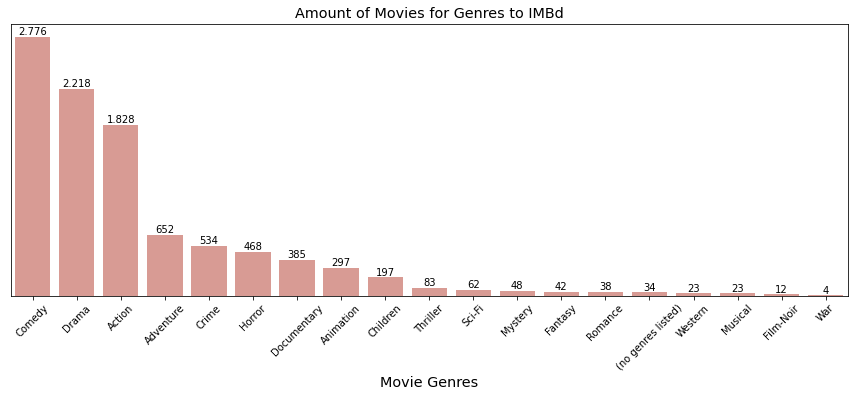

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(
    x=df_imbd_genre["main_genre"], 
    y=df_imbd_genre["count"], 
    data=df_imbd_genre,
    color="salmon",
    saturation=.5,
)
plt.xticks(rotation=45)
ax.get_yaxis().set_visible(False)
ax.set_title("Amount of Movies for Genres to IMBd",fontsize= 'x-large')
ax.set_xlabel('Movie Genres',fontsize= 'x-large')
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 22,
          '{:,}'.format(
              int(retangulo.get_height())).replace(',','.'),
              ha = 'center',
              fontsize='medium'
         )
fig.savefig('images/imbd_amount_movies_genres.jpg')

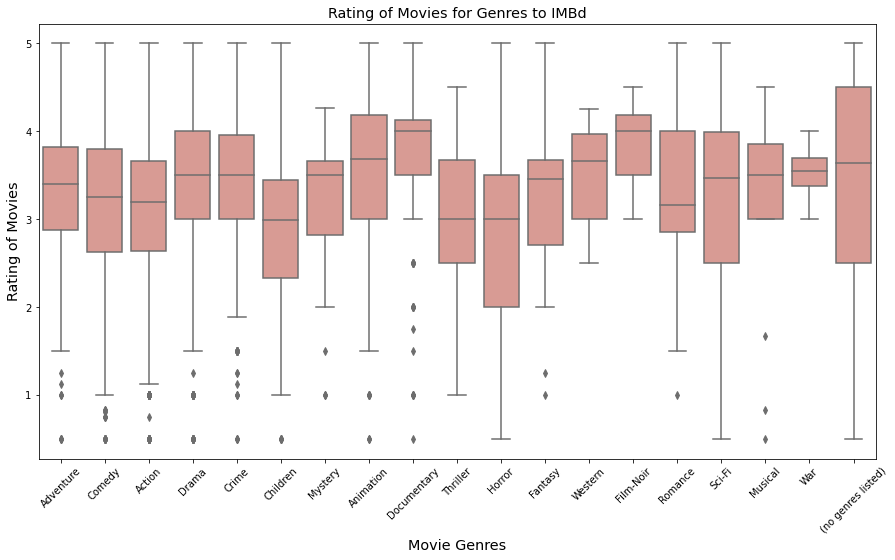

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.xticks(rotation=45)
ax = sns.boxplot(
    x=df_imbd["main_genre"], 
    y=df_imbd["rating"], 
    data=df_imbd,
    color="salmon",
    saturation=.5
)
ax.set_title("Rating of Movies for Genres to IMBd",fontsize= 'x-large')
ax.set_xlabel('Movie Genres',fontsize= 'x-large')
ax.set_ylabel('Rating of Movies',fontsize= 'x-large');
fig.savefig('images/imbd_rating_movies_genres.jpg')

In [25]:
df_imbd_rating = df_imbd.groupby("main_genre").mean().reset_index()[["main_genre","rating"]].sort_values("rating")
df_imbd_rating

,main_genre,rating
11,Horror,2.793645
4,Children,2.827037
16,Thriller,3.007170
15,Sci-Fi,3.066959
1,Action,3.094498
13,Mystery,3.148153
9,Fantasy,3.179774
5,Comedy,3.193691
14,Romance,3.205294
12,Musical,3.276389


In [26]:
df_imbd_rating_mean = df_imbd.groupby("title").mean().rating
df_imbd_rating_mean.sample(3)

title
My Bodyguard           3.857143
Oklahoma               4.500000
Our Family Wedding     1.500000
Name: rating, dtype: float64

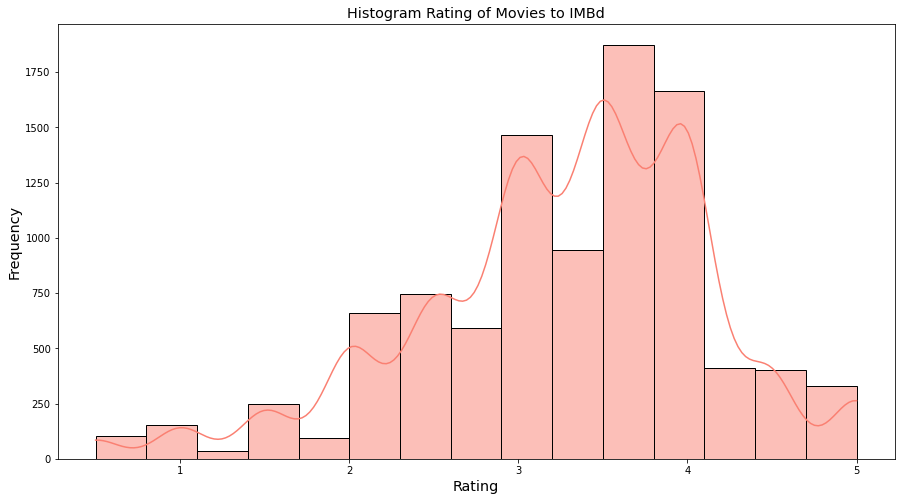

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.histplot(
    data=df_imbd,
    x="rating", 
    color="salmon",
    bins=15,
    kde=True
)
ax.set_title("Histogram Rating of Movies to IMBd",fontsize= 'x-large')
ax.set_xlabel('Rating',fontsize= 'x-large')
ax.set_ylabel('Frequency',fontsize= 'x-large');
fig.savefig('images/imbd_hist_movies_rating.jpg')

In [28]:
year = df_imbd["year"].dropna()

In [29]:
decada = year.str.split(pat="",expand = True)
decada[4] = '0'
decada["decada"] = decada[1] + decada[2] + decada[3] + decada[4]

In [30]:
df_imbd_year = pd.merge(year, decada["decada"], right_index= True, left_index= True)
df_imbd_year

,year,decada
0,1995,1990
1,1995,1990
2,1995,1990
3,1995,1990
4,1995,1990
...,...,...
9719,2017,2010
9720,2017,2010
9721,2017,2010
9722,2018,2010


In [31]:
df_imbd_year = df_imbd_year.astype(str).astype(int)
df_imbd_year = df_imbd_year[df_imbd_year["year"] > 1970]
df_imbd_year = df_imbd_year[df_imbd_year["year"] < 2018]
df_imbd_year

,year,decada
0,1995,1990
1,1995,1990
2,1995,1990
3,1995,1990
4,1995,1990
...,...,...
9718,2015,2010
9719,2017,2010
9720,2017,2010
9721,2017,2010


In [32]:
df_imbd_year["year"].value_counts().to_frame().reset_index()

,index,year
0,2002,310
1,2006,296
2,2001,295
3,2000,290
4,2007,283
5,2009,281
6,2003,278
7,2014,278
8,2004,276
9,1996,275


In [33]:
df_imbd_decada = df_imbd_year["decada"].value_counts().to_frame().reset_index()
df_imbd_decada = df_imbd_decada.rename(columns={"index":"decada","decada":"count"})
df_imbd_decada

,decada,count
0,2000,2850
1,1990,2201
2,2010,1888
3,1980,1172
4,1970,461


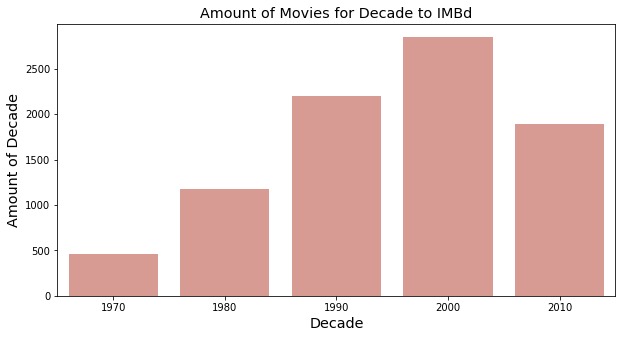

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(
    x=df_imbd_decada["decada"], 
    y=df_imbd_decada["count"], 
    data=df_imbd_decada,
    color="salmon",
    saturation=.5,
)
ax.set_title("Amount of Movies for Decade to IMBd",fontsize= 'x-large')
ax.set_xlabel('Decade',fontsize= 'x-large')
ax.set_ylabel('Amount of Decade',fontsize= 'x-large');
fig.savefig('images/imbd_amount_movies_decade.jpg')

In [35]:
total = df_imbd_decada["count"].sum()
total

8572

In [36]:
df_imbd_decada['percent']= (df_imbd_decada["count"]/total)*100
df_imbd_decada = df_imbd_decada.round(2)
df_imbd_decada

,decada,count,percent
0,2000,2850,33.25
1,1990,2201,25.68
2,2010,1888,22.03
3,1980,1172,13.67
4,1970,461,5.38


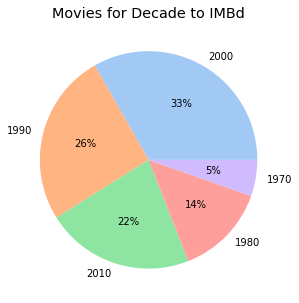

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.pie(
    df_imbd_decada["percent"], 
    labels = df_imbd_decada["decada"], 
    colors = sns.color_palette('pastel')[0:5], 
    autopct='%.0f%%'
)
plt.title("Movies for Decade to IMBd",fontsize= 'x-large')
fig.savefig('images/imbd_amount_movies_decade.jpg')